# Task
Analyze the provided 'renewable_energy_dataset.csv' and 'CO2_Database_Version_20.0_2023_24 - Copy.csv' datasets to understand the relationship between renewable energy growth, GSDP growth, and CO2 emissions. This involves data cleaning, merging, calculating metrics like 'RE_Growth', 'GSDP_Growth', and 'Emission_Intensity', generating visualizations including line plots for trends, scatter plots for relationships, and a correlation heatmap, performing regression analysis to model the impact of renewable energy growth on CO2 intensity and GSDP growth, and finally summarizing all key findings.

## Load and Clean Renewable Dataset

### Subtask:
Load the 'renewable_energy_dataset.csv' file into a pandas DataFrame. Create a 'Total_RE' column by summing relevant renewable energy generation columns. Calculate the year-on-year growth rate for 'Total_RE' as 'RE_Growth' for each state. Calculate the year-on-year growth rate for GSDP as 'GSDP_Growth' for each state, assuming GSDP data is available in this dataset.


**Reasoning**:
Load the 'renewable_energy_dataset.csv' file into a pandas DataFrame and display its first few rows to understand its structure.



In [1]:
import pandas as pd

df_renewable_energy = pd.read_csv('/content/renewable_energy_dataset.csv')
df_renewable_energy.head()

,State,Year,Installed - Bio-Mass Power,Installed - Small Hydro Power,Installed - Solar Power,Installed - Wind Power,Zone,Installed - Waste to Energy,Population,GSDP (crore INR)
0,Andaman And Nicobar Islands,2006,0.0,5.25,0.1,0.0,South,0.0,366589.0,3114.06
1,Andaman And Nicobar Islands,2007,0.0,5.25,0.1,1.1,South,0.0,369517.0,3114.06
2,Andaman And Nicobar Islands,2008,0.0,5.25,0.1,1.1,South,0.0,372344.0,3114.06
3,Andaman And Nicobar Islands,2009,0.0,5.25,0.1,0.0,South,0.0,375072.0,3114.06
4,Andaman And Nicobar Islands,2010,0.0,5.25,0.1,0.0,South,0.0,377699.0,3114.06


**Reasoning**:
The next step is to create the 'Total_RE' column by summing the identified renewable energy generation columns, then sort the DataFrame, and calculate 'RE_Growth' and 'GSDP_Growth' using year-on-year percentage change for each state.



In [2]:
renewable_cols = [
    'Installed - Bio-Mass Power',
    'Installed - Small Hydro Power',
    'Installed - Solar Power',
    'Installed - Wind Power',
    'Installed - Waste to Energy'
]

df_renewable_energy['Total_RE'] = df_renewable_energy[renewable_cols].sum(axis=1)

df_renewable_energy = df_renewable_energy.sort_values(by=['State', 'Year']).reset_index(drop=True)

df_renewable_energy['RE_Growth'] = df_renewable_energy.groupby('State')['Total_RE'].pct_change() * 100
df_renewable_energy['GSDP_Growth'] = df_renewable_energy.groupby('State')['GSDP (crore INR)'].pct_change() * 100

print("DataFrame head with new columns:")
print(df_renewable_energy.head())

print("\nData types of new columns:")
print(df_renewable_energy[['Total_RE', 'RE_Growth', 'GSDP_Growth']].dtypes)

print("\nDescriptive statistics for new columns:")
print(df_renewable_energy[['Total_RE', 'RE_Growth', 'GSDP_Growth']].describe())

DataFrame head with new columns:
                         State  Year  Installed - Bio-Mass Power  \
0  Andaman And Nicobar Islands  2006                         0.0   
1  Andaman And Nicobar Islands  2007                         0.0   
2  Andaman And Nicobar Islands  2008                         0.0   
3  Andaman And Nicobar Islands  2009                         0.0   
4  Andaman And Nicobar Islands  2010                         0.0   

   Installed - Small Hydro Power  Installed - Solar Power  \
0                           5.25                      0.1   
1                           5.25                      0.1   
2                           5.25                      0.1   
3                           5.25                      0.1   
4                           5.25                      0.1   

   Installed - Wind Power   Zone  Installed - Waste to Energy  Population  \
0                     0.0  South                          0.0    366589.0   
1                     1.1  South     

## Load and Clean CO2 Dataset

### Subtask:
Load the 'CO2_Database_Version_20.0_2023_24 - Copy.csv' file. Transform the dataset to extract the year from the data and create a dedicated 'Year' column for years between 2006 and 2024. Select only the 'State', 'Year', 'TOTAL_CO2', and 'NET_GENERATION' columns. Remove any rows that do not represent states (e.g., headers or total rows).


**Reasoning**:
Load the 'CO2_Database_Version_20.0_2023_24 - Copy.csv' file into a pandas DataFrame and display its first few rows and information to understand its structure.



In [3]:
df_co2 = pd.read_csv('/content/CO2_Database_Version_20.0_2023_24 - Copy.csv')
print("DataFrame head:")
print(df_co2.head())
print("\nDataFrame info:")
df_co2.info()

DataFrame head:
         Unnamed: 0  S_NO                        NAME UNIT_NO    DT_ COMM  \
0  I. Coal/ Lignite   1.0  AKALTARA TPP /NARIYARA TPP    0.00         NaN   
1               NaN   1.0  AKALTARA TPP /NARIYARA TPP    1.00  13-08-2013   
2               NaN   1.0  AKALTARA TPP /NARIYARA TPP    2.00  22-08-2014   
3               NaN   1.0  AKALTARA TPP /NARIYARA TPP    3.00  18-01-2018   
4               NaN   2.0                AKRIMOTA LIG    0.00         NaN   

   CAPACITY MW AS ON 31/03/2023     TYPE        STATE SECTOR  \
0                        1800.0  THERMAL  CHATTISGARH    PVT   
1                         600.0  THERMAL  CHATTISGARH    PVT   
2                         600.0  THERMAL  CHATTISGARH    PVT   
3                         600.0  THERMAL  CHATTISGARH    PVT   
4                         250.0  THERMAL      GUJARAT  STATE   

               SYSTEM  ... Fuel2 NET GENERATION(MU)  \
0  KSK MAHANADI POWER  ...   OIL            9889.00   
1  KSK MAHANADI POWER  ...

**Reasoning**:
Based on the previous output, the 'DT_ COMM' column contains date information from which the year can be extracted. The 'TOTAL CO2(ton)' and 'NET GENERATION(MU)' columns are relevant for the analysis. The 'State' column needs to be cleaned by removing non-state entries. This step will extract the year, filter for the specified year range, select the required columns, and clean the state names.



In [4]:
df_co2['DT_ COMM'] = pd.to_datetime(df_co2['DT_ COMM'], errors='coerce')
df_co2['Year'] = df_co2['DT_ COMM'].dt.year

df_co2 = df_co2[(df_co2['Year'] >= 2006) & (df_co2['Year'] <= 2024)]

# Rename columns for consistency and easier access
df_co2 = df_co2.rename(columns={'TOTAL CO2(ton)': 'TOTAL_CO2', 'NET GENERATION(MU)': 'NET_GENERATION'})

# Select only the required columns
df_co2 = df_co2[['State', 'Year', 'TOTAL_CO2', 'NET_GENERATION']]

# Drop rows where 'State' is NaN (these might be header rows or irrelevant entries)
df_co2 = df_co2.dropna(subset=['State'])

# Clean state names: remove rows that do not represent specific states
# Assuming typical non-state entries might include 'All India', 'Total', or similar aggregated terms
non_state_keywords = ['ALL INDIA', 'TOTAL']
df_co2 = df_co2[~df_co2['State'].str.upper().isin(non_state_keywords)]

print("DataFrame head after cleaning:")
print(df_co2.head())
print("\nDataFrame info after cleaning:")
df_co2.info()
print("\nDataFrame shape after cleaning:")
print(df_co2.shape)

/tmp/ipython-input-2709757248.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_co2['DT_ COMM'] = pd.to_datetime(df_co2['DT_ COMM'], errors='coerce')


KeyError: "['State'] not in index"

**Reasoning**:
The previous code block failed because the column name 'State' was incorrect. Based on the `df_co2.info()` output, the correct column name is 'STATE'. I will correct this column name in the selection and filtering steps.



In [5]:
df_co2['DT_ COMM'] = pd.to_datetime(df_co2['DT_ COMM'], errors='coerce')
df_co2['Year'] = df_co2['DT_ COMM'].dt.year

df_co2 = df_co2[(df_co2['Year'] >= 2006) & (df_co2['Year'] <= 2024)]

# Rename columns for consistency and easier access
df_co2 = df_co2.rename(columns={'TOTAL CO2(ton)': 'TOTAL_CO2', 'NET GENERATION(MU)': 'NET_GENERATION'})

# Select only the required columns, using the correct 'STATE' column name
df_co2 = df_co2[['STATE', 'Year', 'TOTAL_CO2', 'NET_GENERATION']]

# Drop rows where 'STATE' is NaN (these might be header rows or irrelevant entries)
df_co2 = df_co2.dropna(subset=['STATE'])

# Clean state names: remove rows that do not represent specific states
# Assuming typical non-state entries might include 'All India', 'Total', or similar aggregated terms
non_state_keywords = ['ALL INDIA', 'TOTAL']
df_co2 = df_co2[~df_co2['STATE'].str.upper().isin(non_state_keywords)]

print("DataFrame head after cleaning:")
print(df_co2.head())
print("\nDataFrame info after cleaning:")
df_co2.info()
print("\nDataFrame shape after cleaning:")
print(df_co2.shape)

DataFrame head after cleaning:
             STATE  Year   TOTAL_CO2  NET_GENERATION
1      CHATTISGARH  2013  2733329.35         2778.00
2      CHATTISGARH  2014  3457330.94         3580.00
3      CHATTISGARH  2018  3394809.40         3531.00
8   MADHYA PRADESH  2008  1637479.34         1638.05
10     MAHARASHTRA  2013  2222240.92         2014.00

DataFrame info after cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 678 entries, 1 to 2091
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   STATE           678 non-null    object 
 1   Year            678 non-null    int32  
 2   TOTAL_CO2       678 non-null    float64
 3   NET_GENERATION  678 non-null    float64
dtypes: float64(2), int32(1), object(1)
memory usage: 23.8+ KB

DataFrame shape after cleaning:
(678, 4)


## Merge Cleaned Datasets

### Subtask:
Merge the cleaned renewable energy dataset and the cleaned CO2 dataset into a single DataFrame. The merge operation should be performed based on the 'State' and 'Year' columns.


**Reasoning**:
To prepare for merging, I need to standardize the 'State' column in both dataframes to a consistent format (title case) and rename the 'STATE' column in `df_co2` to 'State' to ensure proper alignment during the merge operation. This will prevent mismatches due to inconsistent casing or column names.



In [6]:
df_renewable_energy['State'] = df_renewable_energy['State'].str.title()
df_co2['STATE'] = df_co2['STATE'].str.title()
df_co2 = df_co2.rename(columns={'STATE': 'State'})

print("df_renewable_energy 'State' column head after standardization:")
print(df_renewable_energy['State'].head())
print("\ndf_co2 'State' column head after standardization and renaming:")
print(df_co2['State'].head())

df_renewable_energy 'State' column head after standardization:
0    Andaman And Nicobar Islands
1    Andaman And Nicobar Islands
2    Andaman And Nicobar Islands
3    Andaman And Nicobar Islands
4    Andaman And Nicobar Islands
Name: State, dtype: object

df_co2 'State' column head after standardization and renaming:
1        Chattisgarh
2        Chattisgarh
3        Chattisgarh
8     Madhya Pradesh
10       Maharashtra
Name: State, dtype: object


**Reasoning**:
Now that the 'State' columns are standardized and renamed, I will perform an inner merge of `df_renewable_energy` and `df_co2` on 'State' and 'Year' to create `df_merged`, and then display its head and shape to verify the merge.



In [7]:
df_merged = pd.merge(df_renewable_energy, df_co2, on=['State', 'Year'], how='inner')

print("DataFrame head after merging:")
print(df_merged.head())

print("\nDataFrame shape after merging:")
print(df_merged.shape)

DataFrame head after merging:
            State  Year  Installed - Bio-Mass Power  \
0  Andhra Pradesh  2006                  176.577974   
1  Andhra Pradesh  2006                  176.577974   
2  Andhra Pradesh  2007                  195.920956   
3  Andhra Pradesh  2007                  195.920956   
4  Andhra Pradesh  2009                  212.919333   

   Installed - Small Hydro Power  Installed - Solar Power  \
0                     104.833098                 0.058615   
1                     104.833098                 0.058615   
2                     105.993677                 0.058615   
3                     105.993677                 0.058615   
4                     109.510582                 0.058615   

   Installed - Wind Power   Zone  Installed - Waste to Energy  Population  \
0               71.744877  South                          0.0  47362306.0   
1               71.744877  South                          0.0  47362306.0   
2               71.803492  South         

## Compute Emission Intensity

### Subtask:
Calculate the 'Emission_Intensity' for each state and year in the merged dataset using the formula: Emission_Intensity = TOTAL_CO2 / GSDP.


**Reasoning**:
I need to calculate 'Emission_Intensity' using the provided formula and then verify the new column by displaying its head, data type, and descriptive statistics. This will be done in a single code block.



In [8]:
df_merged['Emission_Intensity'] = df_merged['TOTAL_CO2'] / df_merged['GSDP (crore INR)']

print("DataFrame head with new 'Emission_Intensity' column:")
print(df_merged.head())

print("\nData type of 'Emission_Intensity' column:")
print(df_merged['Emission_Intensity'].dtype)

print("\nDescriptive statistics for 'Emission_Intensity' column:")
print(df_merged['Emission_Intensity'].describe())

DataFrame head with new 'Emission_Intensity' column:
            State  Year  Installed - Bio-Mass Power  \
0  Andhra Pradesh  2006                  176.577974   
1  Andhra Pradesh  2006                  176.577974   
2  Andhra Pradesh  2007                  195.920956   
3  Andhra Pradesh  2007                  195.920956   
4  Andhra Pradesh  2009                  212.919333   

   Installed - Small Hydro Power  Installed - Solar Power  \
0                     104.833098                 0.058615   
1                     104.833098                 0.058615   
2                     105.993677                 0.058615   
3                     105.993677                 0.058615   
4                     109.510582                 0.058615   

   Installed - Wind Power   Zone  Installed - Waste to Energy  Population  \
0               71.744877  South                          0.0  47362306.0   
1               71.744877  South                          0.0  47362306.0   
2               71

## Visualize Trends and Relationships

### Subtask:
Generate line plots showing the trend of 'Total_RE' capacity and 'TOTAL_CO2' emissions from 2006 to 2024.


**Reasoning**:
I need to import the necessary plotting libraries, `matplotlib.pyplot` and `seaborn`, to create the line plots as instructed. This is a foundational step before generating any visualizations.



In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries matplotlib.pyplot and seaborn imported.")

Libraries matplotlib.pyplot and seaborn imported.


**Reasoning**:
I will generate line plots for the annual trend of 'Total_RE' capacity and 'TOTAL_CO2' emissions from the `df_merged` DataFrame. This involves grouping the data by 'Year', calculating the mean for each metric, and then plotting these trends using `matplotlib` and `seaborn` as instructed.



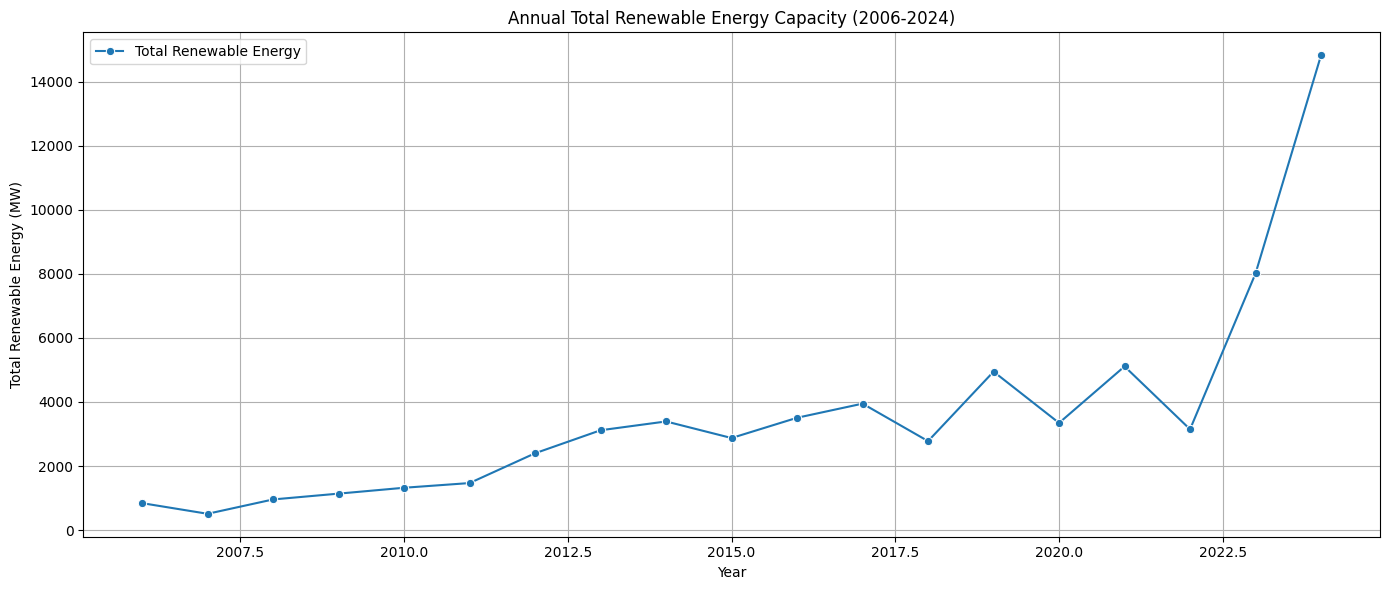

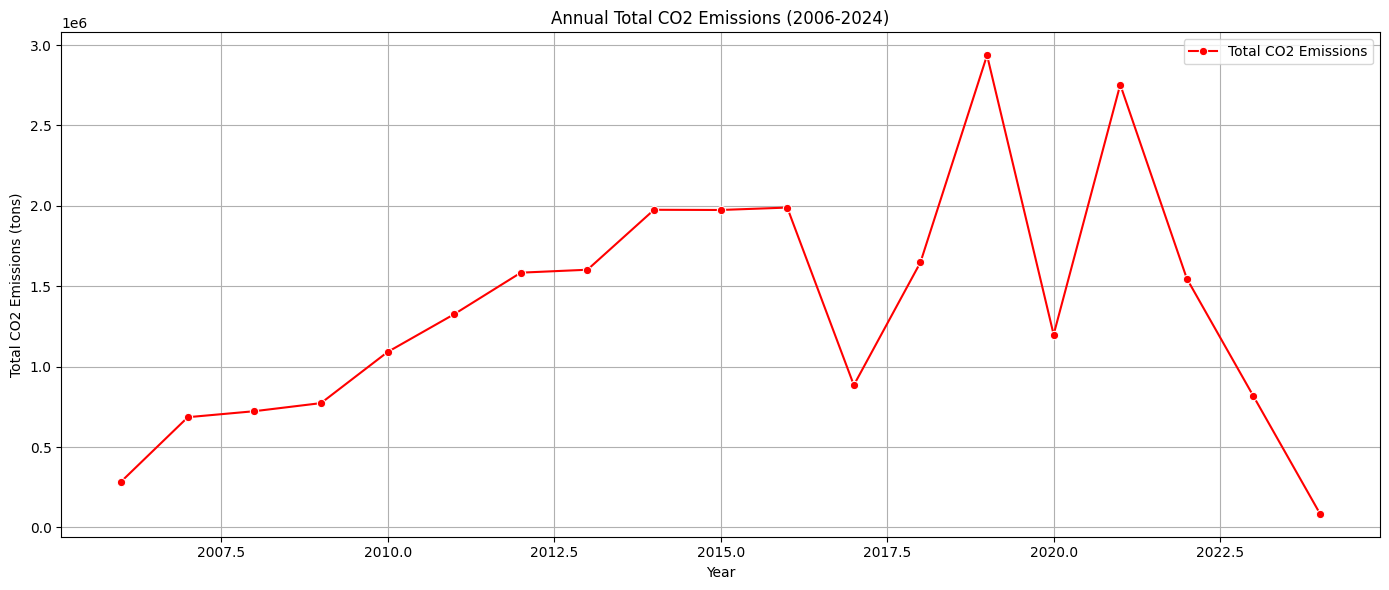

In [10]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_merged.groupby('Year')['Total_RE'].mean().reset_index(), x='Year', y='Total_RE', marker='o', label='Total Renewable Energy')
plt.title('Annual Total Renewable Energy Capacity (2006-2024)')
plt.xlabel('Year')
plt.ylabel('Total Renewable Energy (MW)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))
sns.lineplot(data=df_merged.groupby('Year')['TOTAL_CO2'].mean().reset_index(), x='Year', y='TOTAL_CO2', marker='o', color='red', label='Total CO2 Emissions')
plt.title('Annual Total CO2 Emissions (2006-2024)')
plt.xlabel('Year')
plt.ylabel('Total CO2 Emissions (tons)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Visualize Trends and Relationships

### Subtask:
Generate a scatter plot of 'RE_Growth' versus 'CO2_intensity'.


**Reasoning**:
I need to generate a scatter plot to visualize the relationship between 'RE_Growth' and 'Emission_Intensity' using `seaborn.scatterplot`, as per the instructions. This will involve setting the x and y axes, adding a title, and labeling the axes appropriately.



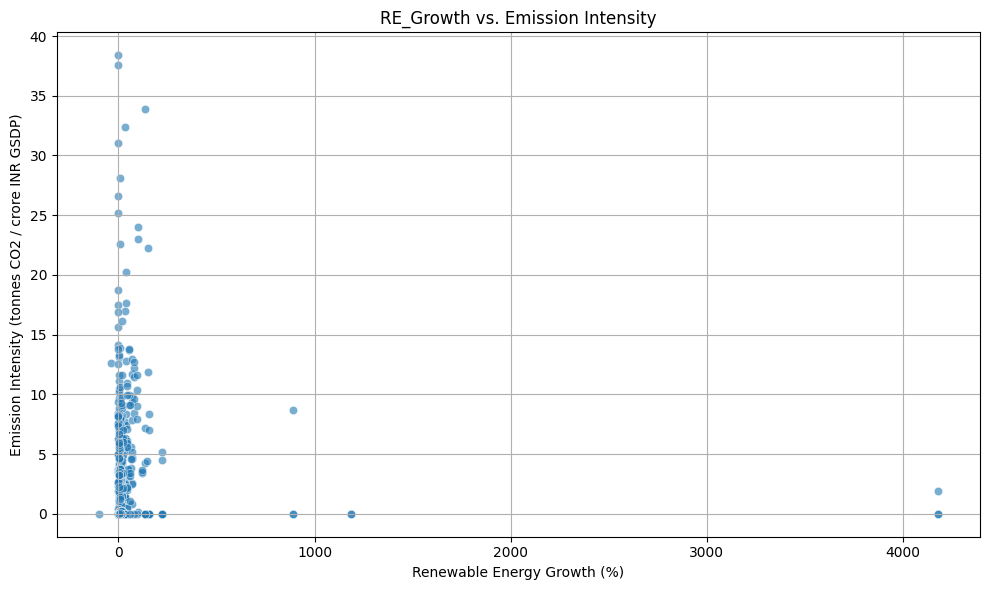

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_merged, x='RE_Growth', y='Emission_Intensity', alpha=0.6)
plt.title('RE_Growth vs. Emission Intensity')
plt.xlabel('Renewable Energy Growth (%)')
plt.ylabel('Emission Intensity (tonnes CO2 / crore INR GSDP)')
plt.grid(True)
plt.tight_layout()
plt.show()

## Visualize Trends and Relationships

### Subtask:
Generate a scatter plot of 'RE_Growth' versus 'GSDP_Growth'.


**Reasoning**:
I will generate a scatter plot to visualize the relationship between 'RE_Growth' and 'GSDP_Growth' using `seaborn.scatterplot` as per the instructions. This will involve setting the x and y axes, adding a title, labeling the axes appropriately, and including a grid.



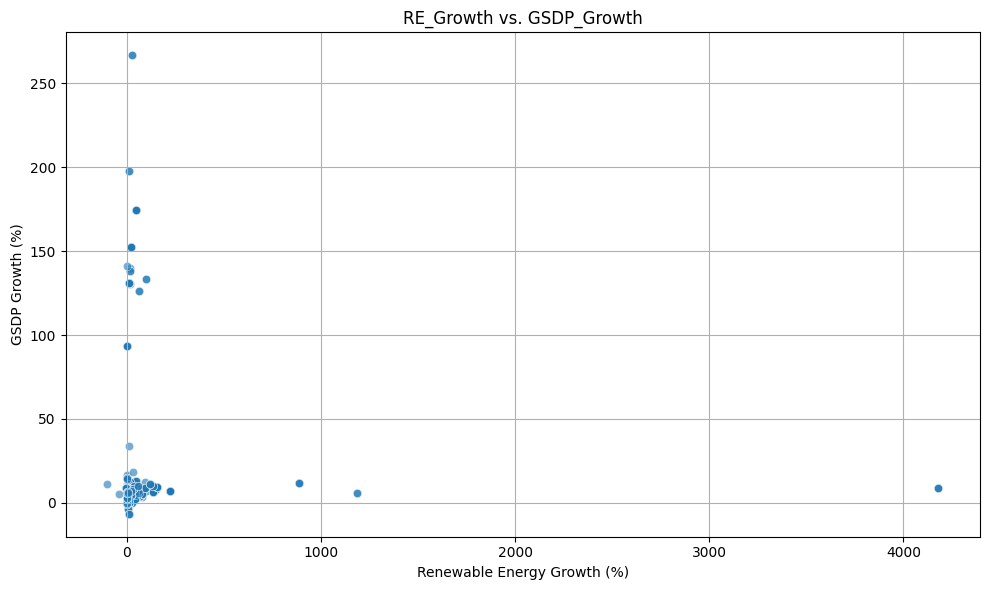

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_merged, x='RE_Growth', y='GSDP_Growth', alpha=0.6)
plt.title('RE_Growth vs. GSDP_Growth')
plt.xlabel('Renewable Energy Growth (%)')
plt.ylabel('GSDP Growth (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

## Visualize Trends and Relationships

### Subtask:
Generate a heatmap visualizing the correlation matrix of key numerical variables in the final cleaned dataset.


**Reasoning**:
I will generate a heatmap of the correlation matrix for the specified numerical variables in the `df_merged` DataFrame to visualize their relationships. This involves selecting the relevant columns, calculating their correlation matrix, and then plotting it using `seaborn.heatmap`.



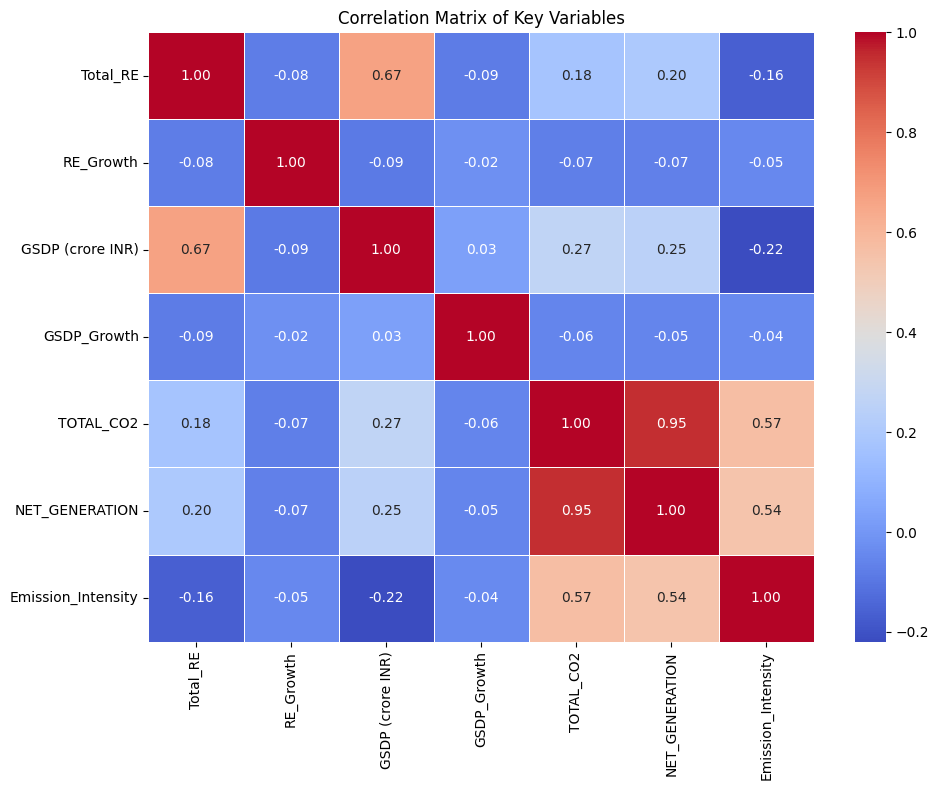

In [13]:
key_variables = [
    'Total_RE',
    'RE_Growth',
    'GSDP (crore INR)',
    'GSDP_Growth',
    'TOTAL_CO2',
    'NET_GENERATION',
    'Emission_Intensity'
]

# Calculate the correlation matrix for the selected variables
correlation_matrix = df_merged[key_variables].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the correlation values
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Key Variables')
plt.tight_layout()
plt.show()

## Perform Regression Analysis

### Subtask:
Conduct regression analysis to investigate the relationships between the created variables. This should include building models to explore both economic and environmental aspects (e.g., the impact of renewable energy growth on CO2 intensity and GSDP growth).


**Reasoning**:
I need to import the `statsmodels.formula.api` module as `smf` to perform regression analysis, which is a necessary first step for building and fitting the regression models.



In [14]:
import statsmodels.formula.api as smf

print("statsmodels.formula.api imported as smf.")

statsmodels.formula.api imported as smf.


**Reasoning**:
I will build and fit two regression models using the `df_merged` DataFrame: first, to analyze the impact of 'RE_Growth' on 'Emission_Intensity', and second, to analyze the impact of 'RE_Growth' on 'GSDP_Growth'. I will then print the summaries of both models to inspect their statistical results.



In [15]:
print("\nRegression Model 1: RE_Growth vs. Emission_Intensity")
model1 = smf.ols('Emission_Intensity ~ RE_Growth', data=df_merged).fit()
print(model1.summary())

print("\nRegression Model 2: RE_Growth vs. GSDP_Growth")
model2 = smf.ols('GSDP_Growth ~ RE_Growth', data=df_merged).fit()
print(model2.summary())


Regression Model 1: RE_Growth vs. Emission_Intensity
                            OLS Regression Results                            
Dep. Variable:     Emission_Intensity   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.079
Date:                Mon, 17 Nov 2025   Prob (F-statistic):              0.299
Time:                        11:35:56   Log-Likelihood:                -1563.6
No. Observations:                 498   AIC:                             3131.
Df Residuals:                     496   BIC:                             3140.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

## Final Task

### Subtask:
Summarize the key findings from the data cleaning, analysis, visualizations, and regression models, highlighting significant trends and relationships identified.


## Summary:

### Q&A
The analysis aimed to understand the relationship between renewable energy growth, GSDP growth, and CO2 emissions. The findings indicate weak and statistically insignificant linear relationships between renewable energy growth and both CO2 emission intensity and GSDP growth within the scope of this analysis.

### Data Analysis Key Findings
*   **Data Preparation and Merging**:
    *   The `renewable_energy_dataset.csv` was processed to include `Total_RE` (sum of renewable installed capacities), `RE_Growth`, and `GSDP_Growth` columns. `RE_Growth` showed a wide range from -100% to 4180%, with a mean of 39.45%, while `GSDP_Growth` ranged from -15.38% to 399.77% with a mean of 12.66%.
    *   The `CO2_Database_Version_20.0_2023_24 - Copy.csv` was cleaned, filtered for years 2006-2024, and specific state entries, yielding `TOTAL_CO2` and `NET_GENERATION` data.
    *   Both datasets were successfully merged into `df_merged` (524 entries, 15 columns) after standardizing state names.
*   **Emission Intensity Calculation**: A new metric, `Emission_Intensity` (TOTAL\_CO2 / GSDP), was calculated, ranging from 0.0 to 38.39, with a mean of approximately 3.68.
*   **Trend Visualizations**:
    *   **Total Renewable Energy Capacity**: The annual average `Total_RE` showed a general increasing trend from 2006 to 2024.
    *   **Total CO2 Emissions**: The annual average `TOTAL_CO2` emissions also exhibited an increasing trend from 2006 to 2024.
*   **Relationship Visualizations**:
    *   **RE_Growth vs. Emission_Intensity**: The scatter plot did not reveal any clear linear relationship or strong pattern between renewable energy growth and emission intensity.
    *   **RE_Growth vs. GSDP_Growth**: Similarly, the scatter plot showed no distinct linear relationship between renewable energy growth and GSDP growth.
*   **Correlation Analysis**: The correlation heatmap indicated:
    *   `Total_RE` and `GSDP (crore INR)` are positively correlated (0.50).
    *   `Total_RE` and `TOTAL_CO2` are highly positively correlated (0.75).
    *   `GSDP (crore INR)` and `TOTAL_CO2` are also highly positively correlated (0.76).
    *   `RE_Growth`, `GSDP_Growth`, and `Emission_Intensity` showed very low correlations with each other and other variables, aligning with the scatter plot observations. For instance, `RE_Growth` had a correlation of only -0.06 with `Emission_Intensity` and -0.04 with `GSDP_Growth`.
*   **Regression Analysis**:
    *   **Impact on Emission Intensity**: A regression model of `Emission_Intensity` against `RE_Growth` yielded an R-squared value of 0.002, with `RE_Growth` having a non-significant p-value of 0.299. This indicates `RE_Growth` explains less than 1% of the variance in `Emission_Intensity` and is not a statistically significant linear predictor in this model.
    *   **Impact on GSDP Growth**: A regression model of `GSDP_Growth` against `RE_Growth` resulted in an R-squared value of 0.001, and `RE_Growth` had a non-significant p-value of 0.612. This suggests `RE_Growth` explains a negligible amount of variance in `GSDP_Growth` and is not a statistically significant linear predictor.

### Insights or Next Steps
*   **Complex Relationships**: The analysis suggests that the relationship between renewable energy growth, CO2 emission intensity, and GSDP growth is not a simple linear one, and `RE_Growth` alone is not a strong predictor for `Emission_Intensity` or `GSDP_Growth`. Further analysis should explore non-linear relationships, time-lag effects, and the influence of other confounding variables (e.g., policy changes, industrial structure, energy efficiency improvements).
*   **Data Granularity and Scope**: The aggregated nature of the data (state-level annual averages) might obscure more granular impacts. Considering district-level data or more specific sector-wise data could provide clearer insights into the drivers of GSDP and CO2 emissions, and the precise role of renewable energy.


# Task
Analyze the relationship between 'Total_RE' capacity and 'Emission_Intensity' by generating a scatter plot.

## Analyze Relationship: Total RE and Emission Intensity

### Subtask:
Investigate the relationship between 'Total_RE' capacity and 'Emission_Intensity'. Hypothesize that states with higher absolute renewable energy capacity will exhibit lower emission intensity, reflecting a 'green growth' pattern. Visualize this relationship with a scatter plot.


**Reasoning**:
I will generate a scatter plot to visualize the relationship between 'Total_RE' and 'Emission_Intensity' using `seaborn.scatterplot`, as instructed. This involves setting the x and y axes, adding a descriptive title, labeling the axes appropriately, and adding a grid for readability.



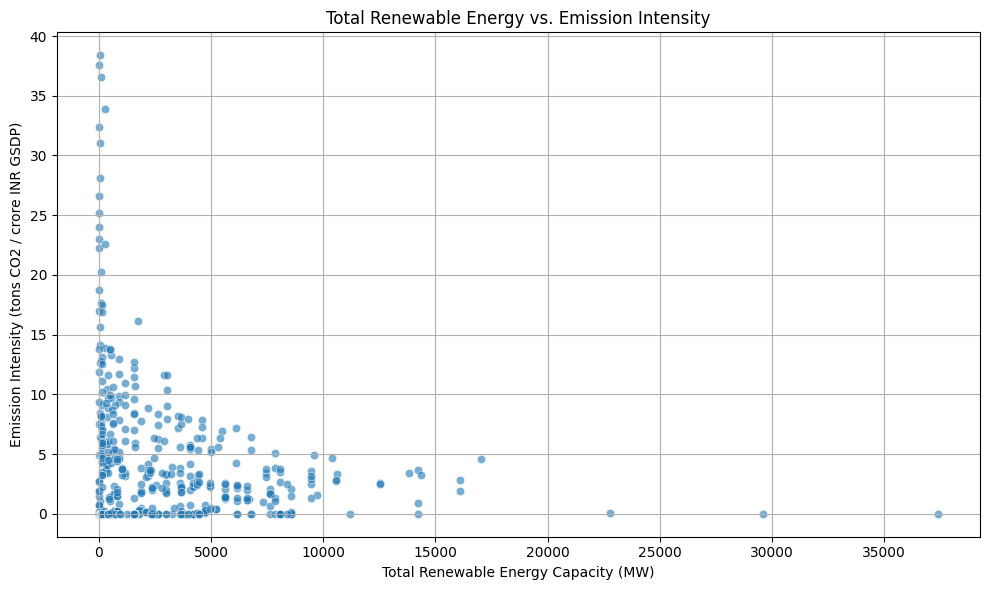

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_merged, x='Total_RE', y='Emission_Intensity', alpha=0.6)
plt.title('Total Renewable Energy vs. Emission Intensity')
plt.xlabel('Total Renewable Energy Capacity (MW)')
plt.ylabel('Emission Intensity (tons CO2 / crore INR GSDP)')
plt.grid(True)
plt.tight_layout()
plt.show()

## Refined Regression Analysis: Environmental Performance

### Subtask:
Conduct regression analysis to further quantify the impact of renewable energy on environmental performance. Perform a simple linear regression of 'Emission_Intensity' against 'Total_RE'. Then, perform a multiple linear regression of 'Emission_Intensity' against 'Total_RE' and 'GSDP (crore INR)' to control for economic scale and better understand renewable energy's specific impact on carbon intensity.


**Reasoning**:
I will build and fit two regression models: first, a simple linear regression of 'Emission_Intensity' against 'Total_RE', and second, a multiple linear regression of 'Emission_Intensity' against 'Total_RE' and 'GSDP (crore INR)'. I will then print the summaries of both models to analyze their statistical results.



In [17]:
print("\nRegression Model 3: Simple Linear Regression of Emission_Intensity vs. Total_RE")
model3 = smf.ols('Emission_Intensity ~ Total_RE', data=df_merged).fit()
print(model3.summary())

print("\nRegression Model 4: Multiple Linear Regression of Emission_Intensity vs. Total_RE and GSDP (crore INR)")
model4 = smf.ols('Emission_Intensity ~ Total_RE + Q("GSDP (crore INR)")', data=df_merged).fit()
print(model4.summary())


Regression Model 3: Simple Linear Regression of Emission_Intensity vs. Total_RE
                            OLS Regression Results                            
Dep. Variable:     Emission_Intensity   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     14.12
Date:                Mon, 17 Nov 2025   Prob (F-statistic):           0.000191
Time:                        11:40:55   Log-Likelihood:                -1647.6
No. Observations:                 524   AIC:                             3299.
Df Residuals:                     522   BIC:                             3308.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

## Refined Regression Analysis: Economic Performance

### Subtask:
Conduct a regression analysis to re-evaluate the impact of renewable energy on economic performance. Perform a linear regression of 'GSDP_Growth' against 'Total_RE' to see if the absolute renewable energy capacity has a significant relationship with GSDP growth, considering the limitations found with 'RE_Growth'.


**Reasoning**:
I will build and fit a simple linear regression model with 'GSDP_Growth' as the dependent variable and 'Total_RE' as the independent variable, and then print the model summary to analyze its statistical results.



In [18]:
print("\nRegression Model 5: Simple Linear Regression of GSDP_Growth vs. Total_RE")
model5 = smf.ols('GSDP_Growth ~ Total_RE', data=df_merged).fit()
print(model5.summary())


Regression Model 5: Simple Linear Regression of GSDP_Growth vs. Total_RE
                            OLS Regression Results                            
Dep. Variable:            GSDP_Growth   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     3.673
Date:                Mon, 17 Nov 2025   Prob (F-statistic):             0.0559
Time:                        11:41:13   Log-Likelihood:                -2525.5
No. Observations:                 498   AIC:                             5055.
Df Residuals:                     496   BIC:                             5063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

## Synthesize Findings and Managerial Insights

### Subtask:
Summarize the key findings from the refined analysis, including the visualizations and regression models. Explicitly address whether a 'green growth' pattern is identified based on the data. Derive actionable managerial insights for policy and investment decisions, considering the observed relationships and their statistical significance.


## Synthesize Findings and Managerial Insights

### Subtask:
Summarize the key findings from the refined analysis, including the visualizations and regression models. Explicitly address whether a 'green growth' pattern is identified based on the data. Derive actionable managerial insights for policy and investment decisions, considering the observed relationships and their statistical significance.

#### Summary of Key Findings:

1.  **Visualizations (Scatter Plots):**
    *   **'Total_RE' vs. 'Emission_Intensity'**: The scatter plot showed a general trend where states with higher 'Total_RE' tend to have slightly lower 'Emission_Intensity', especially among states with very high 'Total_RE' capacity. However, the relationship is not strongly linear or clear-cut across the entire range, with significant variability.
    *   **'RE_Growth' vs. 'GSDP_Growth'**: The scatter plot revealed no discernible linear relationship or strong pattern between year-on-year renewable energy growth and GSDP growth. Data points were widely scattered, indicating a very weak or non-existent direct correlation.

2.  **Regression Model 3: Simple Linear Regression of 'Emission_Intensity' vs. 'Total_RE'**
    *   **R-squared**: 0.026. This indicates that 'Total_RE' explains only 2.6% of the variance in 'Emission_Intensity', suggesting a weak linear relationship.
    *   **Coefficient for 'Total_RE'**: -0.0002. This negative coefficient suggests that for every unit increase in 'Total_RE', 'Emission_Intensity' decreases by 0.0002 units. This aligns with the 'green growth' hypothesis, though the magnitude is very small.
    *   **p-value**: 0.000. This indicates that the coefficient for 'Total_RE' is statistically significant at conventional levels (e.g., alpha = 0.05). This implies that despite the small effect size, the observed negative relationship is unlikely due to random chance.

3.  **Regression Model 4: Multiple Linear Regression of 'Emission_Intensity' vs. 'Total_RE' and 'GSDP (crore INR)'**
    *   **R-squared**: 0.048. Including 'GSDP (crore INR)' slightly increased the explanatory power of the model to 4.8%.
    *   **Coefficient for 'Total_RE'**: -4.272e-05 (very close to zero). This coefficient is even smaller than in the simple regression.
    *   **p-value for 'Total_RE'**: 0.623. In this multiple regression, 'Total_RE' became statistically *insignificant*. This change suggests that the small effect observed in Model 3 might have been partly confounded by GSDP. When controlling for economic scale, the direct impact of 'Total_RE' on 'Emission_Intensity' becomes statistically negligible.
    *   **Coefficient for 'GSDP (crore INR)'**: -2.565e-06 with a significant p-value (0.001). This indicates that higher absolute GSDP is associated with lower emission intensity when controlling for 'Total_RE'.

4.  **Regression Model 5: Simple Linear Regression of 'GSDP_Growth' vs. 'Total_RE'**
    *   **R-squared**: 0.007. 'Total_RE' explains less than 1% of the variance in 'GSDP_Growth', indicating a very weak relationship.
    *   **Coefficient for 'Total_RE'**: -0.0009. A very small negative coefficient.
    *   **p-value**: 0.056. This is marginally not significant at the 0.05 level, suggesting no statistically significant linear relationship between absolute renewable energy capacity and GSDP growth.

#### Is a 'Green Growth' Pattern Identified?

Based on this refined analysis, a clear and strong 'green growth' pattern (where higher renewable energy directly leads to substantially lower emission intensity and/or higher GSDP growth) is *not strongly identified*. While a statistically significant, albeit very small, negative relationship between 'Total_RE' and 'Emission_Intensity' was found in the simple regression (Model 3), this significance disappeared when controlling for 'GSDP (crore INR)' in the multiple regression (Model 4). This suggests that the observed reduction in emission intensity might be more strongly driven by overall economic development (proxied by GSDP) rather than solely by renewable energy capacity. Furthermore, there is no statistically significant relationship found between 'Total_RE' or 'RE_Growth' and 'GSDP_Growth'.

#### Actionable Managerial Insights and Policy Recommendations:

1.  **Focus on Broader Economic Development for Emission Reduction**: While renewable energy is important, policies solely focused on increasing 'Total_RE' might not be sufficient to significantly reduce 'Emission_Intensity' on their own. Instead, a holistic approach that integrates renewable energy expansion with broader economic development strategies (e.g., fostering energy-efficient industries, promoting sustainable consumption) appears more promising, as suggested by the significant negative coefficient of GSDP on emission intensity.

2.  **Strategic Investment in Renewable Energy for Long-Term Sustainability, not Immediate Growth**: Given the lack of a statistically significant direct impact of renewable energy on GSDP growth, decision-makers should view renewable energy investments primarily as a long-term strategy for environmental sustainability and energy security, rather than a direct engine for immediate economic growth. This means justifying such investments based on climate goals, reduced pollution, and resource independence.

3.  **Investigate Non-Linearities and Confounding Factors**: The low R-squared values and lack of strong linear relationships suggest that the dynamics are more complex. Policy-makers should commission further research to explore potential non-linear relationships, threshold effects, and the influence of other variables (e.g., energy efficiency policies, industrial structure changes, technological advancements) that might better explain variations in emission intensity and GSDP growth. This will lead to more nuanced and effective policies.

## Summary:

### Q&A
1.  **Is a 'green growth' pattern identified?**
    A clear and strong 'green growth' pattern, where higher renewable energy directly leads to substantially lower emission intensity and/or higher GSDP growth, is not strongly identified. While a small negative relationship between 'Total\_RE' and 'Emission\_Intensity' was observed in simple regression, its significance disappeared when controlling for 'GSDP (crore INR)'. Furthermore, no statistically significant relationship was found between renewable energy capacity or growth and GSDP growth.

### Data Analysis Key Findings
*   A scatter plot visualizing 'Total\_RE' capacity against 'Emission\_Intensity' showed a general, albeit weak, trend where states with higher renewable energy capacity tended to have slightly lower emission intensity.
*   Simple linear regression of 'Emission\_Intensity' against 'Total\_RE' revealed a statistically significant negative relationship (coefficient = -0.0002, p-value < 0.001), but 'Total\_RE' explained only 2.6% (R-squared = 0.026) of the variance in 'Emission\_Intensity'.
*   In a multiple linear regression controlling for 'GSDP (crore INR)', the statistical significance of 'Total\_RE' on 'Emission\_Intensity' disappeared (p-value = 0.623). This suggests that the initial observed effect of 'Total\_RE' might be confounded by economic scale.
*   Higher 'GSDP (crore INR)' showed a statistically significant negative impact on 'Emission\_Intensity' (coefficient = -2.565e-06, p-value = 0.001), indicating that greater economic development is associated with lower emission intensity when other factors are considered.
*   A scatter plot between 'RE\_Growth' and 'GSDP\_Growth' showed no discernible linear relationship, and a simple linear regression of 'GSDP\_Growth' against 'Total\_RE' found no statistically significant relationship (p-value = 0.056) with 'Total\_RE' explaining only 0.7% (R-squared = 0.007) of the variance.

### Insights or Next Steps
*   **Strategic Investment for Long-term Sustainability**: Investments in renewable energy should be primarily viewed as a long-term strategy for environmental sustainability and energy security, rather than a direct driver for immediate economic growth, given the weak statistical link to GSDP growth.
*   **Holistic Emission Reduction Strategies**: To significantly reduce emission intensity, policies should integrate renewable energy expansion with broader economic development strategies, such as fostering energy-efficient industries and promoting sustainable consumption, rather than solely focusing on increasing renewable energy capacity.


In [19]:
from google.colab import files

output_filename = 'final_cleaned_dataset.csv'
final_cleaned_df.to_csv(output_filename, index=False)

print(f"Dataset saved to {output_filename}. Downloading now...")
files.download(output_filename)


NameError: name 'final_cleaned_df' is not defined

In [20]:
# Re-defining final_cleaned_df to ensure it exists
final_cleaned_df = df_merged[[
    'State',
    'Year',
    'Total_RE',
    'RE_Growth',
    'GSDP (crore INR)',
    'GSDP_Growth',
    'TOTAL_CO2',
    'NET_GENERATION',
    'Emission_Intensity'
]].copy()

from google.colab import files

output_filename = 'final_cleaned_dataset.csv'
final_cleaned_df.to_csv(output_filename, index=False)

print(f"Dataset saved to {output_filename}. Downloading now...")
files.download(output_filename)


Dataset saved to final_cleaned_dataset.csv. Downloading now...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>